In [24]:
# Load libraries and check memory

import psutil ; print(list(psutil.virtual_memory())[0:2])

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import xgboost as xgb

import pickle

import gc
gc.collect()
print(list(psutil.virtual_memory())[0:2])

[16897961984, 8302034944]
[16897961984, 8301854720]


In [25]:
# Load custom functions

import GAN_171103

# For reloading after making changes
import importlib
importlib.reload(GAN_171103) 
from GAN_171103 import *


In [67]:
data = pd.read_csv("networkICIj.csv")
print(data.shape)
print(data.columns)
data.head(3)

(2717763, 2)
Index(['10000018', 'business-/documentId[10000018]/nodeId[12180349]#¬#icij'], dtype='object')


10000018 business-/documentId[10000018]/nodeId[12180349]#¬#icij
0  10000117  business-/documentId[10000001]/nodeId[11001746...    
1  10000149              business-/documentId[10000149]#¬#icij    
2  10000168  individual-/documentId[10000168]/nodeId[121859...

In [82]:
train = data.copy()

In [60]:
import sklearn.cluster as cluster

train = data.loc[ data['Class']==1 ].copy()

KeyError: 'Class'

In [69]:
train.head(2)

10000018 business-/documentId[10000018]/nodeId[12180349]#¬#icij
0  10000117  business-/documentId[10000001]/nodeId[11001746...    
1  10000149              business-/documentId[10000149]#¬#icij

In [70]:
fraud_w_classes = train.copy()


In [71]:
fraud_w_classes.head(2)

10000018 business-/documentId[10000018]/nodeId[12180349]#¬#icij
0  10000117  business-/documentId[10000001]/nodeId[11001746...    
1  10000149              business-/documentId[10000149]#¬#icij

In [10]:
<a id="GAN setup"><h1>GAN setup and training</h1></a>

<a href='#TOC'>Table of contents</a>

Resources:

https://github.com/wayaai/GAN-Sandbox
<br>
http://blog.richardweiss.org/2017/07/21/conditional-wasserstein-gan.html

Conversion of Waya.ai GAN and WGAN
- Remove convolutional layers
- Remove ResNeXt
- Add simple dense networks
- Convert WGAN back to simple GAN
- Use common functions as much as possible




For these functions I've passed the arguments as lists because it was easy to implement.

Standard solutions (because they are more stable) include using keyword dictionaries or objects, but those create a larger code base.


SyntaxError: invalid syntax (<ipython-input-10-3baf0720b5b9>, line 1)

In [80]:

# reloading the libraries and setting the parameters


import GAN_171103
import importlib
importlib.reload(GAN_171103) # For reloading after making changes
from GAN_171103 import *

rand_dim = 32 # 32 # needs to be ~data_dim
base_n_count = 128 # 128

nb_steps = 500 + 1 # 50000 # Add one for logging of the last interval
batch_size = 128 # 64

k_d = 1  # number of critic network updates per adversarial training step
k_g = 1  # number of generator network updates per adversarial training step
critic_pre_train_steps = 100 # 100  # number of steps to pre-train the critic before starting adversarial training
log_interval = 100 # 100  # interval (in steps) at which to log loss summaries and save plots of image samples to disc
learning_rate = 5e-4 # 5e-5
data_dir = 'cache/'
generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None

# show = False
show = True 

# train = create_toy_spiral_df(1000)
# train = create_toy_df(n=1000,n_dim=2,n_classes=4,seed=0)
train = fraud_w_classes.copy().reset_index(drop=True) # fraud only with labels from classification

# train = pd.get_dummies(train, columns=['Class'], prefix='Class', drop_first=True)
# label_cols = [ i for i in train.columns if 'Class' in i ]
data_cols = [ i for i in train.columns if i not in label_cols ]
# #train[ data_cols ] = train[ data_cols ] / 10 # scale to random noise size, one less thing to learn
train_no_label = train.copy()

In [83]:
%%time

# Training the vanilla GAN and CGAN architectures

k_d = 1  # number of critic network updates per adversarial training step
learning_rate = 5e-4 # 5e-5
arguments = [rand_dim, nb_steps, batch_size, 
             k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
            data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

adversarial_training_GAN(arguments, train_no_label, data_cols ) # GAN
adversarial_training_GAN(arguments, train, data_cols=data_cols, label_cols=label_cols ) # CGAN

data_dim:  2
data_cols:  ['10000018', 'business-/documentId[10000018]/nodeId[12180349]#¬#icij']
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_61 (InputLayer)        (None, 32)                0         
_________________________________________________________________
dense_185 (Dense)            (None, 128)               4224      
_________________________________________________________________
dense_186 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_187 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_188 (Dense)            (None, 2)                 1026      
Total params: 169,858
Trainable params: 169,858
Non-trainable params: 0
_________________________________________________________________
None
___________________________________

ValueError: could not convert string to float: 'business-/documentId[20007896]#¬#icij'

data_dim:  30
data_cols:  ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_44 (InputLayer)        (None, 32)                0         
_________________________________________________________________
dense_121 (Dense)            (None, 128)               4224      
_________________________________________________________________
dense_122 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_123 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_124 (Dense)            (None, 30)                15390     
Total params: 184,222
Trainable params: 18

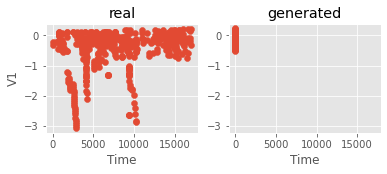

Step: 100 of 501.
Losses: G, D Gen, D Real, Xgb: -3679.5776, 3404.3503, 23394.3730, 1.0000
D Real - D Gen: 19990.0234


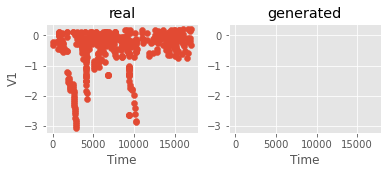

Step: 200 of 501.
Losses: G, D Gen, D Real, Xgb: -2941.2634, 2483.9473, 2953.3472, 1.0000
D Real - D Gen: 469.3999


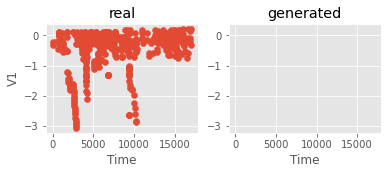

Step: 300 of 501.
Losses: G, D Gen, D Real, Xgb: -86.1594, 94.9651, 104.1796, 1.0000
D Real - D Gen: 9.2144


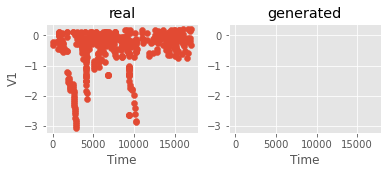

Step: 400 of 501.
Losses: G, D Gen, D Real, Xgb: 239.7729, -179.7717, -178.7273, 1.0000
D Real - D Gen: 1.0444


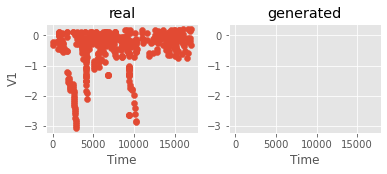

Step: 500 of 501.
Losses: G, D Gen, D Real, Xgb: -1430.0887, 1395.0941, 1444.5339, 0.9980
D Real - D Gen: 49.4398


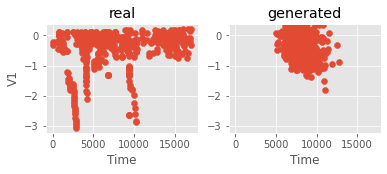

data_dim:  30
data_cols:  ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
label_dim:  1
label_cols:  ['Class']
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_46 (InputLayer)           (None, 32)           0                                            
__________________________________________________________________________________________________
input_47 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
concatenate_27 (Concatenate)    (None, 33)           0           input_46[0][0]                   
                                      

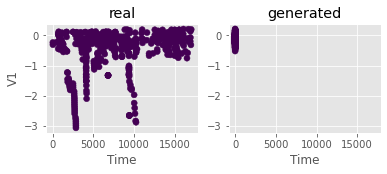

Step: 100 of 501.
Losses: G, D Gen, D Real, Xgb: -3908.3599, 3625.3552, 22944.6602, 1.0000
D Real - D Gen: 19319.3047


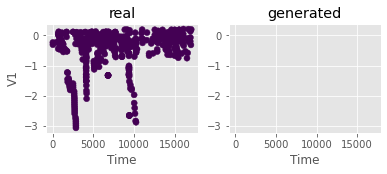

Step: 200 of 501.
Losses: G, D Gen, D Real, Xgb: -1889.7860, 1410.2861, 1587.8555, 1.0000
D Real - D Gen: 177.5693


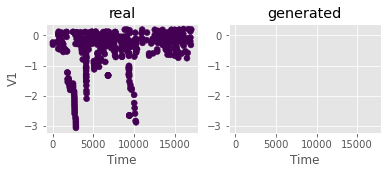

Step: 300 of 501.
Losses: G, D Gen, D Real, Xgb: 51.8900, -25.0833, -24.0128, 1.0000
D Real - D Gen: 1.0704


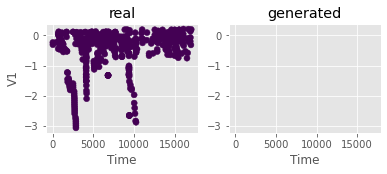

Step: 400 of 501.
Losses: G, D Gen, D Real, Xgb: 509.2927, -377.6815, -374.4614, 1.0000
D Real - D Gen: 3.2201


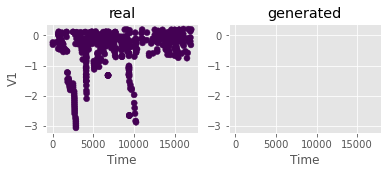

Step: 500 of 501.
Losses: G, D Gen, D Real, Xgb: -1378.7814, 1331.8075, 1378.3346, 1.0000
D Real - D Gen: 46.5271


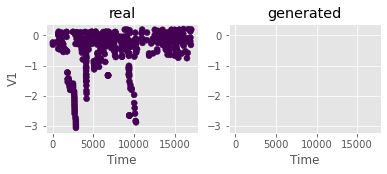

Wall time: 1min 11s


In [57]:
%%time

# Training the WGAN and WCGAN architectures

k_d = 5 # train critic to optimal state each time
learning_rate = 5e-4 # 5e-5
arguments = [rand_dim, nb_steps, batch_size, 
             k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
            data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

adversarial_training_WGAN(arguments, train_no_label, data_cols=data_cols ) # WGAN
adversarial_training_WGAN(arguments, train, data_cols=data_cols, label_cols=label_cols ) # WCGAN

In [33]:
# %%time

# # for continued training

# import GAN_1711103
# import importlib
# importlib.reload(GAN_171103) # For reloading after making changes
# from GAN_171103 import *

# last_step = 1000
# prefix = 'WGAN'
# # data_dir = 'cache lr mix base 128 act mix 171026/'
# data_dir = 'cache/'

# # Choose your learning rate
# # learning_rate = 1e-5 # first 10k
# # learning_rate = 1e-5 # 10-15k
# # learning_rate = 1e-6 # 15-20k

# generator_model_path = data_dir + prefix + '_generator_model_weights_step_' + str(last_step) + '.h5'
# discriminator_model_path = data_dir + prefix + '_discriminator_model_weights_step_' + str(last_step) + '.h5'
# loss_pickle_path = data_dir + prefix + '_losses_step_' + str(last_step) + '.pkl'

# nb_steps = 4000

# arguments = [rand_dim, nb_steps, batch_size, 
#              k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
#             data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

# # Choose your training algorithm
# # adversarial_training_GAN(arguments, train_no_label, data_cols=data_cols, starting_step=last_step+1 ) # GAN
# # adversarial_training_GAN(arguments, train, data_cols=data_cols, label_cols=label_cols, starting_step=last_step+1 ) # CGAN
# # adversarial_training_WGAN(arguments, train_no_label, data_cols=data_cols, starting_step=last_step+1 ) # WGAN
# adversarial_training_WGAN(arguments, train, data_cols=data_cols, label_cols=label_cols, starting_step=last_step+1 ) # WCGAN

In [34]:
# For reloading loss data from pickles

prefix = 'WCGAN'
step = 500

[combined_loss, disc_loss_generated, disc_loss_real, xgb_losses] = pickle.load(
    open(data_dir+prefix+'_losses_step_'+str(step)+'.pkl','rb'))

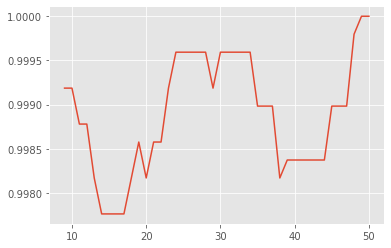

In [35]:
# plt.plot( xgb_losses[:] ) ;
w = 10
plt.plot( pd.DataFrame(xgb_losses[:]).rolling(w).mean() ) ;

In [36]:
# Look for the step with the lowest xgboost accuracy, and the lowest step saved (every 100)

best_step = list(xgb_losses).index( xgb_losses.min() ) * 10
print( best_step, xgb_losses.min() )

xgb100 = [ xgb_losses[i] for i in range(0, len(xgb_losses), 10) ]
best_step = xgb100.index( min(xgb100) ) * log_interval
print( best_step, min(xgb100) )

380 0.991869918699187
200 0.9959349593495935


In [37]:
delta_losses = np.array(disc_loss_real) - np.array(disc_loss_generated)

best_step = list(delta_losses).index( delta_losses.min() )
print( best_step, delta_losses.min() )

delta100 = [ delta_losses[i] for i in range(0, len(delta_losses), 100) ]
best_step = delta100.index( min(delta100) ) * log_interval
print( best_step, min(delta100) )

0 16763.258
0 16763.258


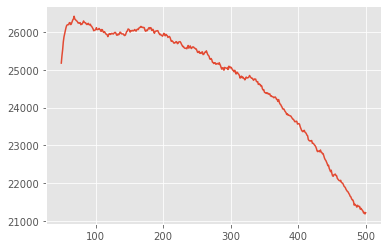

In [38]:
# plt.plot( (np.array(disc_loss_real) - np.array(disc_loss_generated)) )

w = 50
# plt.plot( list(range(0,5001,1)), pd.rolling_mean((np.array(disc_loss_real) - np.array(disc_loss_generated)),w) )
plt.plot( pd.DataFrame(disc_loss_real[:]).rolling(w).mean() - pd.DataFrame(disc_loss_generated[:]).rolling(w).mean() ) ;

# plt.xlim([9000,10000])
# plt.ylim([0.03,0.05])

In [50]:
# Let's look at some of the generated data
# First create the networks locally and load the weights

import GAN_171103
import importlib
importlib.reload(GAN_171103) # For reloading after making changes
from GAN_171103 import *

seed = 17

train = fraud_w_classes.copy().reset_index(drop=True) # fraud only with labels from classification

# train = pd.get_dummies(train, columns=['Class'], prefix='Class', drop_first=True)
label_cols = [ i for i in train.columns if 'Class' in i ]
data_cols = [ i for i in train.columns if i not in label_cols ]
train[ data_cols ] = train[ data_cols ] / 10 # scale to random noise size, one less thing to learn
train_no_label = train[ data_cols ]

data_dim = len(data_cols)
label_dim = len(label_cols)
with_class = False
if label_dim > 0: with_class = True
np.random.seed(seed)

# define network models

# generator_model, discriminator_model, combined_model = define_models_CGAN(rand_dim, data_dim, label_dim, base_n_count, type='Wasserstein')
# generator_model.load_weights('cache/WCGAN_generator_model_weights_step_4800.h5')
generator_model, discriminator_model, combined_model = define_models_CGAN(rand_dim, data_dim, label_dim, base_n_count)
generator_model.load_weights('cache/CGAN_generator_model_weights_step_500.h5')


# with_class = False
# train = train_no_label
# label_cols = []
# # generator_model, discriminator_model, combined_model = define_models_GAN(rand_dim, data_dim, base_n_count, type='Wasserstein')
# # generator_model.load_weights('cache/WGAN_generator_model_weights_step_4800.h5')

# generator_model, discriminator_model, combined_model = define_models_GAN(rand_dim, data_dim, base_n_count)
# generator_model.load_weights('cache/GAN_generator_model_weights_step_5000.h5')

AttributeError: 'str' object has no attribute 'decode'

In [55]:
# Now generate some new data
i = 0
j=0
test_size = 492 # Equal to all of the fraud cases

x = get_data_batch(train, test_size, seed=i+j)
z = np.random.normal(size=(test_size, rand_dim))
if with_class:
    labels = x[:,-label_dim:]
    g_z = generator_model.predict([z, labels])
else:
    g_z = generator_model.predict(z)

1.0


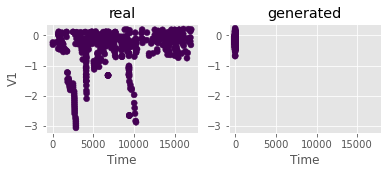

In [56]:
print( CheckAccuracy( x, g_z, data_cols, label_cols, seed=0, with_class=with_class, data_dim=data_dim ) )

PlotData( x, g_z, data_cols, label_cols, seed=0, with_class=with_class, data_dim=data_dim )